# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# создаем датафрейм из файла .csv
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# выведем первые строки
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# посмотрим общую информацию по датафрейму
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Выводы по общим сведениям о датафрейме:**
- Содержит 23699 записей с 22 характеристиками по объектам недвижимости.
- Дает полную информацию (по всем записям) о `последней цене`, `общей площади`, `дате объявления`, `количестве комнат`, `этаж`, отнесении к категории `"студия"` и`"свободной планировке"`, а также `количество фотографий`.
- В данных по `остальным столбцам` имеются пропуски.
- `Дата объявления` представлена в текстовой форме.

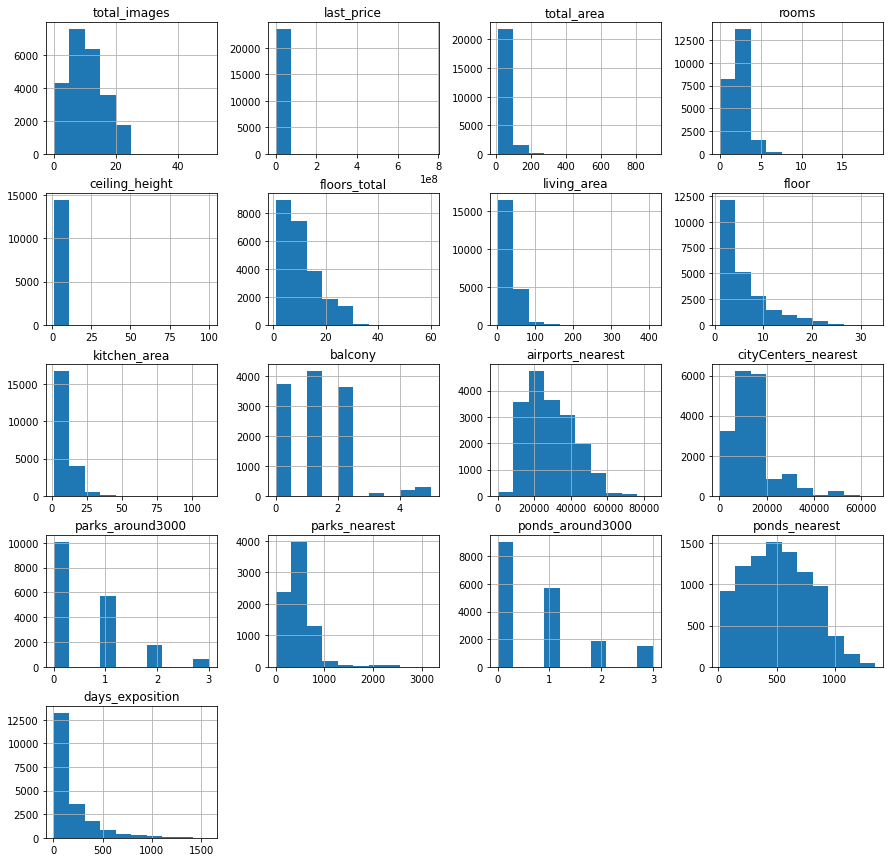

In [4]:
# создадим гистограммы по всем числовым признакам
data.hist(figsize=(15, 15));

**Выводы по анализу гистограмм:**
- Часть гистограмм малоинформативны из-за влияния выбросов (`последняя цена`, `общая площадь`, `количество комнат`, `высота потолка`, `жилая площадь` и `площадь кухни`).
- Наибольшее предложение объектов в зданиях с `общим количестом этажей` менее 10.
- Несоответствие данных по `паркам` и `водоёмам`: большое количество объектов с отсутствие `парков и водоёмов в радиусе 3000м`, при этом `ближайший парк и водоём` находятся в большинстве случаем `ближе 1500м`.
- `Количество балконов` в предложениях примерно равным образом распределено между значениями `0`, `1`, `2`.
- Большинство объектов находятся `ближе 60 км от центра города`, и `ближе 80 км от аэропорта`.

In [5]:
# посмотрим описательные статистики по числовым признакам
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Выводы по анализу общих статистик:**
- В минимальные и максимальные значения гарантировано попадают выбросы (стоимость на два порядка выше значения 3 квартиля) и аномальные значения (высота потолка 1 м и 100 м).
- Большая разница между средним-арифметическим и медианным значением (период размещения объявления) говорит о характере распределения (распределение Пирсона)
- Статистики позволяют узнать параметры распределения количественных признаков (минимальное,среднее и максимальное значения, медиану стандартное отклонение).

### Предобработка данных

#### Поиск и изучение пропущенных значений в стобцах

In [6]:
# определим наименование столбцов с пропусками и количество пропущенных значений
data.isna().sum()[data.isna().sum() > 0]

ceiling_height          9195
floors_total              86
living_area             1903
is_apartment           20924
kitchen_area            2278
balcony                11519
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
parks_nearest          15620
ponds_around3000        5518
ponds_nearest          14589
days_exposition         3181
dtype: int64

**Предварительные выводы:**
- Пространственные признаки (`удаленность от центра`, `аэропорта`, `парка` и `водоемов`) следует оставить неопределенными, так как нет возможности из имеющихся значений или значений других признаков.
- `Количество этажей` в здании также следует `оставить без изменения`, так как невозможно востановить эти значения на основании других признаков.
- `Высота потолка` в большинстве случаев стандартизирована (межквартильный размах составляет 0,28 м). Пропущенные значения следует заполнить `медианой`.
- Наличие `балконов` и категория "`аппартаменты"` являются существенными характеристиками, и отсутствие информации по ним можно считать что их нет.
- Возможно, `местоположение` не указано для самого Санкт-Петербурга. Необходимо проверить `удаленность от центра` по записям без указания `местоположения`.
- Данные по `сроку публикации` объявления скорее всего генерируются самим сайтом. В таком случае отсутствие данных означает, что на момент формирования таблицы статус объявлений был "действующие". Стоит оставить эти пропуски без изменения.
- Возможно, отсутствие значений о `жилой площади` и `площади кухни` связано с категорией `"свободная планировка"`. В таком случае пропуски можно заполнить 0, если такой связи нет - оставить пропуски "как есть".

In [7]:
# заполним отсутствующие значения высоты потолка медианой
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
# проверим, что отсутствующих значений больше нет
data['ceiling_height'].isna().sum()

0

In [8]:
# заменим пропуски по наличию балконов на 0, а на принадлежность к категории "апартаменты" на False
data.fillna({'balcony': 0, 'is_apartment': False}, inplace=True)
# проверим, что все получилось
data[['balcony', 'is_apartment']].isna().sum()

balcony         0
is_apartment    0
dtype: int64

In [9]:
# узнаем, сколько записей без указания местоположнения не имеют также данных по удаленности от центра
data.query('locality_name.isna()')['cityCenters_nearest'].isna().sum()

8

Только 8 из 49 записей без указания местопложения не имеют также данных по удаленности от центра.  
  
  
Сравним статистики по удаленности от цунтра между записями по Санкт-Петербургу и с пропущенными данными

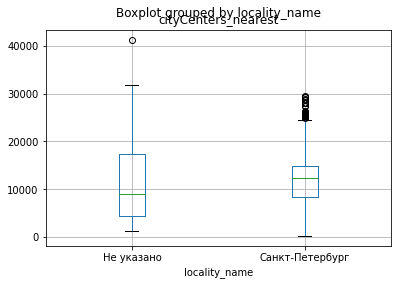

In [10]:
# построим "ящичные" диаграммы, которые отражают основные статистики
(data
.fillna({'locality_name':'Не указано'})  # Для целей группировки заменим пропуски на "Не указано" 
.query('locality_name == "Не указано" or locality_name == "Санкт-Петербург"')  # Фильтруем нужное
.boxplot(column='cityCenters_nearest', by='locality_name'));

Медианное значение местоположения `"Не указано"` даже ближе к центру, чем явно указанное местоположение `"Санкт-Петербург"`. Следовательно можно заполнить пропуски значением `"Санкт-Петербург"`.

In [11]:
# заменим пропуски по наличию балконов на 0, а на принадлежность к категории "апартаменты" на False
data.fillna({'locality_name': 'Санкт-Петербург'}, inplace=True)
# проверим, что все получилось
data['locality_name'].isna().sum()

0

In [12]:
# посчитаем в скольких объявлениях указана "свобоная планировка" 
data['open_plan'].sum()

67

Количество объявлений с `"свободной планировкой" (67)` в сравнении с количеством объявлений `без указания жилой площади (1903)` и `без указания площади кухни (2278)` позволяет отказаться от предположении о связи между этими признаками. Оставляем `пропуски без изменения`.

**Выводы:**
- Определены признаки, по которым возможно заполнить отсутствующие значения.
- `Высота потолка` - пропущенные значения заполнены `медианой`.
- Наличие `балконов` и категория "`аппартаменты"` - пропуски заполнены значением 0 и False соответственно.
- `Местоположение` - после проверки `удаленности от центра` пропуски заполнены значением `Санкт-Петербург`.
- Связь между отсутствием значений о `жилой площади`, `площади кухни` и категорией `"свободная планировка"`- не обрнаружена; пропуски оставлены "как есть".

#### Изучение и преобразование при необходимости типов данных

**Столбцы, которые требуют преобразования типа данных:**
- Дата размещения (`first_day_exposition`) - необходимо преобразовать их текстового формата в `формат даты-времени` для проведения вычислений.
- Количество балконов (`balcony`) - вещественное число `float` необходимо преобразовать в целочисленное значениу `int`.

In [13]:
# преобразуем формат данных столбца с датой размещения объявления
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data.loc[:, 'balcony'] = data['balcony'].astype('int8')
# проверим, что получилось
data[['first_day_exposition', 'balcony']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   first_day_exposition  23699 non-null  datetime64[ns]
 1   balcony               23699 non-null  int8          
dtypes: datetime64[ns](1), int8(1)
memory usage: 208.4 KB


#### Поиски и устранение неявных дубликатов в категорийных данных

In [14]:
# посмотрим на уникальныe значения в столбце местоположение
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

**Особенности написания населенных пунктов:**
- тип населенного пункта может указываться в начале местоположения,
- все слова относящиеся к типу начинаются с маленькой буквы,
- `собственное имя` населенного пункта или его части начинаются с `заглавной буквы`,
- некоторые населенные пункты имеют `префикс "имени"`.

In [15]:
# используем регулярные выражения и метод .str.extract() для выделения собственного имени населенного пункта
data['good_locality_name'] = data['locality_name'].str.extract(r'((имени )?([А-Я].*)+$)')[0]

In [16]:
print("Количество первоначальных уникальных названий:",
      len(data['locality_name'].unique()))
print("Количество уникальных названий после устранения дубликатов:",
      len(data['good_locality_name'].unique()))
# проверим группировку старых названий в новые
data.groupby(['good_locality_name', 'locality_name']).agg({'locality_name':'count'}).head(20)

Количество первоначальных уникальных названий: 364
Количество уникальных названий после устранения дубликатов: 305


locality_name
good_locality_name locality_name                                       
Агалатово          деревня Агалатово                                  4
Александровская    посёлок Александровская                            2
Алексеевка         посёлок Алексеевка                                 1
Аннино             поселок Аннино                                     5
                   посёлок Аннино                                    11
Аро                деревня Аро                                        3
Барышево           поселок Барышево                                   2
Батово             деревня Батово                                     9
Бегуницы           деревня Бегуницы                                  17
Белогорка          деревня Белогорка                                 11
Белоостров         посёлок Белоостров                                 1
Бокситогорск       Бокситогорск                                      16
Большая Вруда      деревня Большая Вруда                              4
Большая Ижора      городской поселок Большая Ижора                   16
                   поселок городского типа Большая Ижора              1
Большая Пустомержа деревня Большая Пустомержа                         1
Большие Колпаны    деревня Большие Колпаны                           16
Большое Рейзино    деревня Большое Рейзино                            1
Большой Сабск      деревня Большой Сабск                              1
Бор                деревня Бор                                        2

#### Поиск и устранение выбивающихся значений

In [17]:
# в начале исследования необычное распределение обнаружено в следующих столбцах
columns_to_explore = ['last_price', 'total_area', 'rooms',
                      'ceiling_height', 'living_area', 'kitchen_area']

In [18]:
def multi_boxplot(data: pd.DataFrame, columns: list) -> None:
    """Печатает коробочную диаграмму для каждого столбца в списке"""
    cols = len(columns) // 2 + bool(len(columns) % 2)
    fig, axes = plt.subplots(nrows=2, ncols=cols, figsize=(15, 15))

    for nrow in range(2):
        for ncol in range(cols):
            # при одном столбце список меняет размерность
            ax = axes[nrow] if cols == 1 else axes[nrow][ncol]
            data.boxplot(column=columns[nrow*cols + ncol],
                         ax=ax);

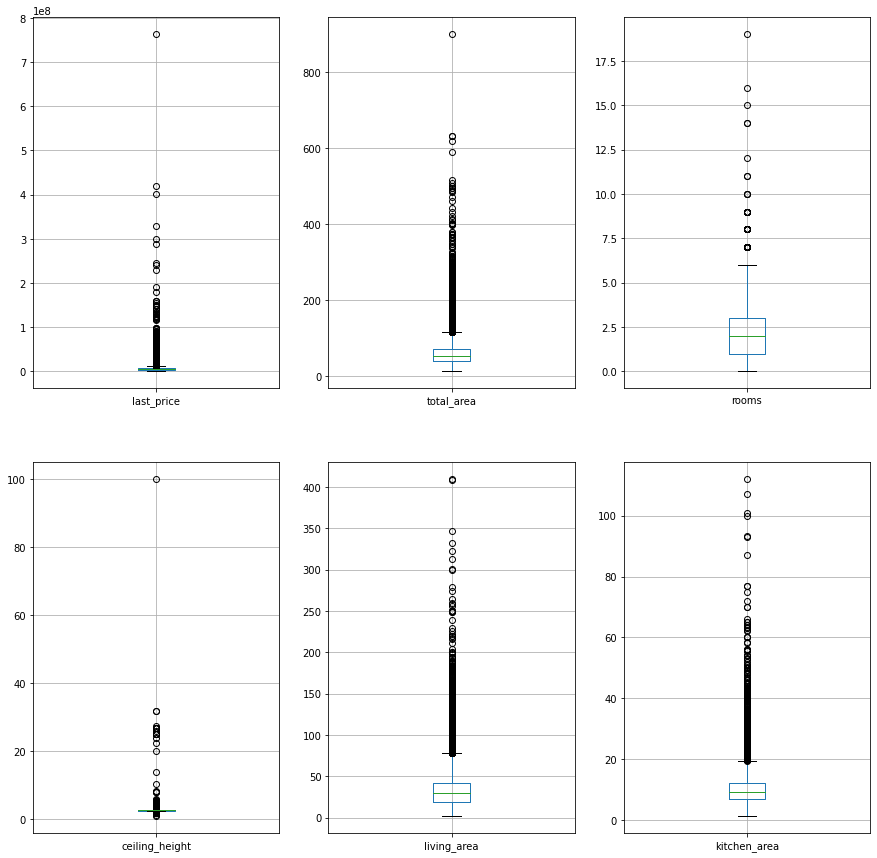

In [19]:
# с помощью коробчатой диаграммы посмотрим распределение значений в указанных столбцах
multi_boxplot(data, columns_to_explore)

In [20]:
# создадим функцию-фильтр для отделения "нормальных" значений от выбросов
def drop_outliers(x: pd.Series, factor: float=1.5) -> pd.Series:
    """
    Возращает маску для выбора значений без выбросов.
    Фактор определяет количество межквартильных размахов,
    откладываемых от первого и третьего квартилей.
    """
    Q1 = x.quantile(.25)
    Q3 = x.quantile(.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return (lower <= x) & (x <= upper)

In [21]:
# отфильтруем выбросы по цене квартиры
cost_outliers_data = data[~drop_outliers(data['last_price'], 3)]  # поместим выбросы сюда
good_data = data[drop_outliers(data['last_price'], 3)]

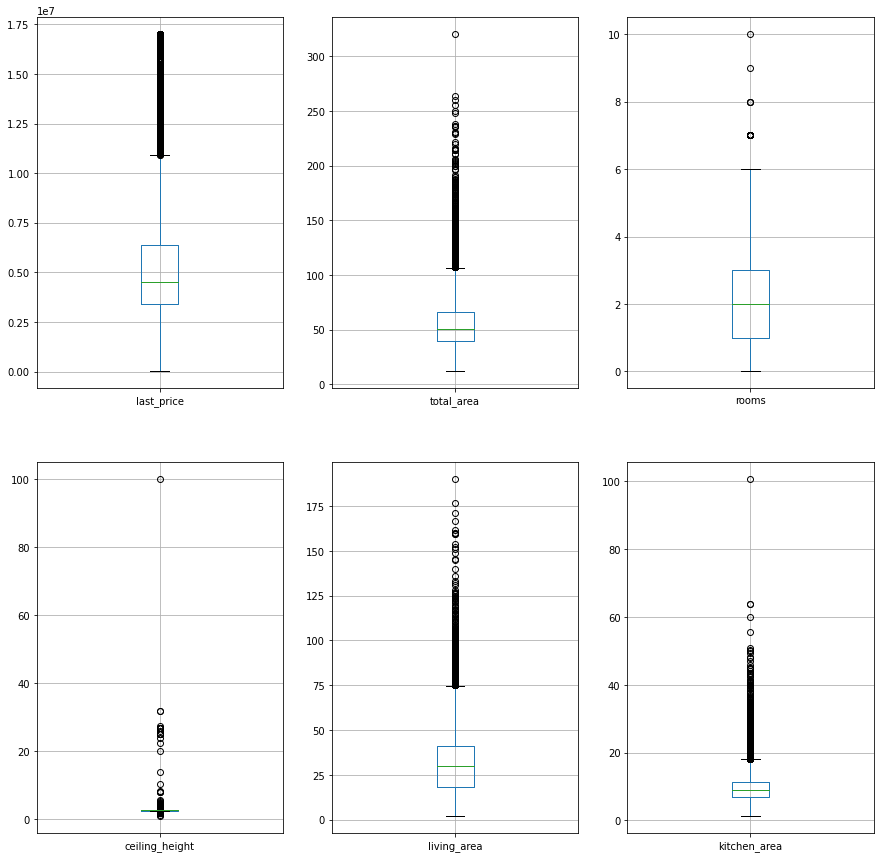

In [22]:
# посмотрим, как изменилось распределение
multi_boxplot(good_data, columns_to_explore)

**Предварительные выводы:**
- Одновременно с `ценой` более нормальный вид приобрели распределения `общей площади`, `жилой площади` и `количества комнат`.
- В `высоте потолка` и `площади кухни` имеются аномальные значения.

In [23]:
# выберем записи, у которых общая площадь меньше суммы площадей кухни и жилой
wrong_kitchen_area =(good_data
 .query('total_area < living_area + kitchen_area')[['total_area', 'living_area', 'kitchen_area']]
 .sort_values('kitchen_area', ascending=False))
wrong_kitchen_area

,total_area,living_area,kitchen_area
7239,90.0,76.4,43.4
21266,60.0,35.0,35.0
21915,91.4,62.0,32.4
11046,70.0,50.0,32.1
4366,47.7,39.8,28.2
...,...,...,...
184,30.2,26.1,6.2
7680,38.8,33.0,6.0
11150,42.3,37.7,5.4
10696,45.0,42.0,5.3


In [24]:
# скорректируем значения площади кухни = общая площадь - жилая (где необходимо)
good_data.loc[wrong_kitchen_area.index, 'kitchen_area'] = good_data.eval('total_area - living_area')

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Особенностями постройки квартир в `СанктПетербурге` до 1917 года были `высокие потолки`.  
Ниже приведен источник, подтверждающий это.  
  
  
***Екатерина Юхнёва. Глава 4. Размеры домов. Петербургские доходные дома***  
Обычная высота потолков в квартирах достигала 3,5-4,2 метра, что почти совпадало с гигиеническими нормами, принятыми российскими гигиенистами во главе с проф. Ф.Ф. Эрисманом. В подвалах и мансардах высота — от 4 аршин (2,8 м). Самые низкие были антресольные помещения — от 3 аршин (2,1 м). `Самые высокие` — парадные помещения «барских» квартир — до 7,5 аршина (`5,3 м`)

In [25]:
# посмотрим, как распределены выбивающиеся значения по высоте потолка
good_data.query('not (1.9 < ceiling_height < 5.4)').ceiling_height.value_counts()

27.00     8
25.00     7
8.00      3
32.00     2
14.00     1
20.00     1
1.20      1
8.30      1
100.00    1
5.80      1
10.30     1
22.60     1
1.75      1
26.00     1
27.50     1
24.00     1
1.00      1
Name: ceiling_height, dtype: int64

**Аномалии по высоте потолка (33 случая):**
- 24 случая (наиболее распространенная причина) увеличение высоты на порядок (в 10 раз)
- 9 случаев - причина неясна
- лучший выход - замена аномальных значений медианой

In [26]:
# заменим аномальную высоту потолка медианным значением
good_data['ceiling_height'] = (good_data['ceiling_height']
                               .where((1.9 < good_data['ceiling_height']) &
                               (good_data['ceiling_height'] < 5.4),
                               good_data.ceiling_height.median()))

/tmp/ipykernel_90/2864524325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['ceiling_height'] = (good_data['ceiling_height']


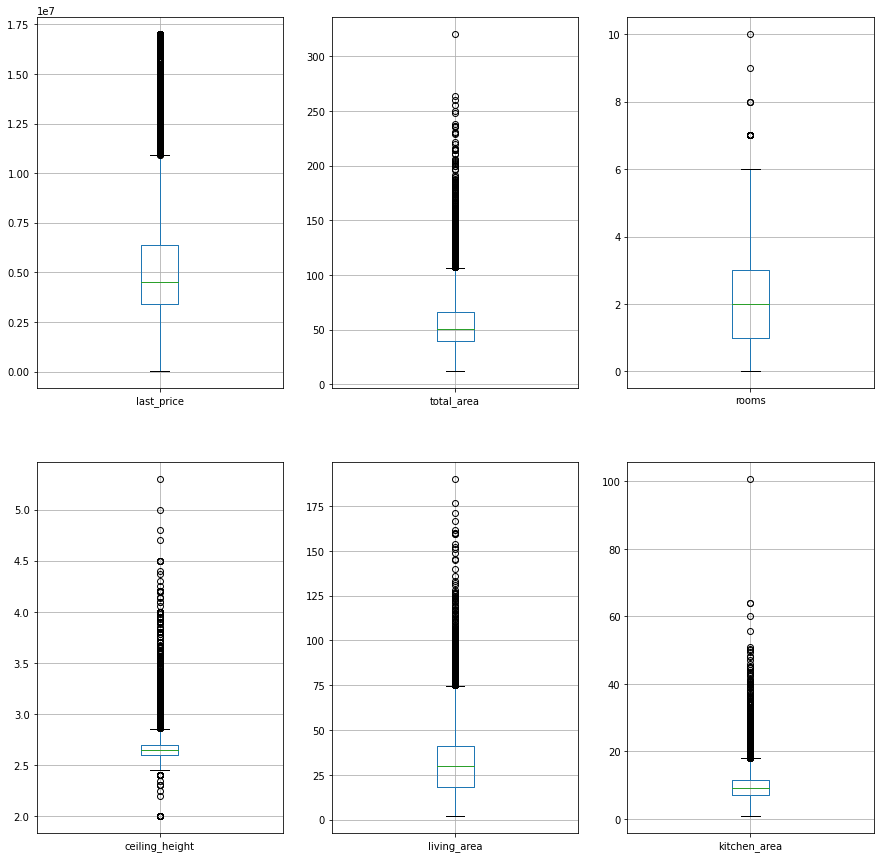

In [27]:
multi_boxplot(good_data, columns_to_explore)

**Выводы:**
- Удаление имеющихся выбросов по `последней цене` предложения привело к улучшению распределения значений по столбцам `общей` и `жилой площади`, `количеству комнат`.
- Выявлена аномалия в некоторых записях, где `сумма жилой площади` и `площади кухни` `превышала общую площадь`. Аномальные значения были заменены на разницу от вычитания из общей площади жилой.
- Выявлены аномальные значения `высоты потолка` и заменены медианой.

### Посчитайте и добавьте в таблицу новые столбцы

In [28]:
# цена квадратного метра
good_data.loc[:, 'price_sqm'] = good_data.eval('last_price / total_area');

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [29]:
# день недели размещения публикации
good_data.loc[:, 'day_of_week_exposition'] = good_data['first_day_exposition'].dt.dayofweek;

In [30]:
# месяц публикации объявления
good_data.loc[:, 'month_exposition'] = good_data['first_day_exposition'].dt.month;

In [31]:
# год публикации объявления
good_data.loc[:, 'year_exposition'] = good_data['first_day_exposition'].dt.year;

In [32]:
# тип этажа квартиры
def floor_category(i: int) -> str:
    """
    Принимает индекс объекта DataFrame.
    Возвращает категорию этажа.
    """
    if good_data.loc[i, 'floor'] == 1:
        return "первый"
    if good_data.loc[i, 'floor'] == good_data.loc[i, 'floors_total']:
        return "последний"
    return "другой"

good_data['floor_category'] = good_data.index.to_series().apply(floor_category)

/tmp/ipykernel_90/3766600495.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['floor_category'] = good_data.index.to_series().apply(floor_category)


In [33]:
# расстояние до центра в километрах
good_data['cityCenters_km'] = good_data.eval('cityCenters_nearest.truediv(1000).round()')

/tmp/ipykernel_90/3518377106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['cityCenters_km'] = good_data.eval('cityCenters_nearest.truediv(1000).round()')


In [34]:
# посмотрим, что получилось
good_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,good_locality_name,price_sqm,day_of_week_exposition,month_exposition,year_exposition,floor_category,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,Санкт-Петербург,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0.0,NaN,81.0,Шушары,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,2.0,574.0,558.0,Санкт-Петербург,92785.714286,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,Санкт-Петербург,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,NaN,55.0,Янино-1,95065.789474,0,9,2018,другой,NaN


### Проведите исследовательский анализ данных

#### Изучение характеристик объектов

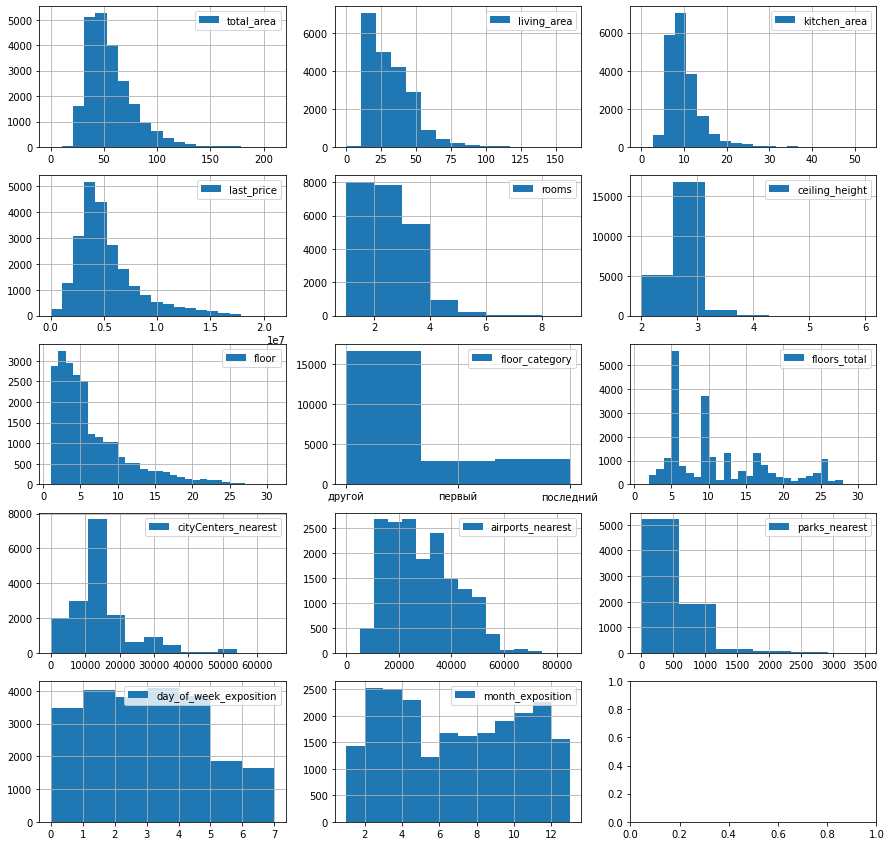

In [35]:
# создадим гистограммы для заданных признаков
# для каждого признака укажем количество рангов и диапазон
hist_config = {
    'total_area': {'bins': 20, 'range':(0, 210)},
    'living_area': {'bins': 15, 'range':(0, 160)},
    'kitchen_area': {'bins': 20, 'range':(0, 52.5)},
    'last_price': {'bins': 20, 'range':(0, 21000000)},
    'rooms': {'bins': 8, 'range':(1, 9)},
    'ceiling_height': {'bins': 7, 'range':(2, 6.0)},
    'floor': {'bins': 30, 'range':(1, 31)},
    'floor_category': {'bins': 3, 'range':(0, 2)},
    'floors_total': {'bins': 30, 'range':(1, 31)},
    'cityCenters_nearest': {'bins': 12, 'range':(0, 65000)},
    'airports_nearest': {'bins': 16 , 'range':(0, 85000)},
    'parks_nearest': {'bins': 6, 'range':(0, 3500)},
    'day_of_week_exposition': {'bins': 7, 'range':(0, 7)},
    'month_exposition': {'bins': 12, 'range':(1, 13)}
}

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

nrow, ncol = 0, 0
for hist in hist_config:
    good_data[hist].hist(ax=axes[nrow][ncol], bins=hist_config[hist]['bins'],
                         range=hist_config[hist]['range'], legend=True)
    # изменяет номер столбца: 0 - 1 - 2 - 0
    ncol += 1 if ncol < 2 else -2
    # увеличивает номер строки на 1, если номер столбца становится 0
    nrow +=1 if ncol == 0 else 0


**Выводы по исследованию характеристик объектов:**
- `Общая площадь` - характер распределения квартир ассиметричный, наибольшая частота предложения приходится на квартиры менее 50 квадратных метров. Предложение на квартиры большей площади (справа) характеризуется более пологим склоном к отметке в 150 квадратных метров.
- `Жилая площадь` - очень ассиметричное распределение со сдвигом влево с максимальной частотой предложения 10-20 квадратных метров. Предложение на большую жилую площадьь (справа) характеризуется более пологим склоном к отметке 100 квадратных метров.
- `Площадь кухни` - наибольшими частотами предложения чвляются квартиры с площадью кухни (по мере убывания частоты): 9, 6 и 12 квадратных метров.
- `Цена объекта` - график распределения цены на объекты полностью повторяет график распределения общей площади квартир. Наибольшее предложение отмечается в диапазоне 3 - 4 млн. рублей.
- `Количество комнат` - преобладает предложение 1-2х комнатных квартир (примерно поровну), несколько ниже предложение 3-х комнатных квартир. Квартиры с большим количеством комнат занимют значительно меньшую долю от предложения.
- `Высота потолков` - преобладающее значение находится в диапазоне 2.5 - 3 метров. Имеется незначительное количество квартир в домах старой постройки с потолками до 4.5 метров.
- `Этаж квартиры` - наибольшее количество предлагаемых квартир располагаются на 1-5 этажах (максимальное прдложение соответствует 2-му этажу). Само распределение квартир по этажу "ступенчатое", что наиболее вероятно связано с особенностями этажности застроойки.
- `Тип этажа квартиры` - наибольше предложение квартир, которы располагаются не на первом или последнем этажах.
- `Общее количество этажей в доме` - распределение характеризуется несколькими локальными максимумами: 5, 9, 12, 16, 25 этажей, которые соответствуют наиболее часто встречаемыми домам типовой застройки.
- `Расстояние до центра города` в метрах - наибольшее количество предлагаемых квартир расположено не далее 15 км от центра (максимум распределения- 10-15 км).
- `Расстояние до ближайшего аэропорта` - наибольшее количество предлагаемых квартир находится на расстоянии от 10 до 50 км от аэропорта. Распределение в этом диапазоне примерно равномерное.
- `Расстояние до ближайшего парка` - в большинстве случаев парк находится не далее 500 м, почти всегда не далее 1000 м от предлагаемых квартир.
- `День публикации объявления` - наиболее часто объявления размещаются в буднии дни (равномерно с понедельника по пятницу). В выходные дни количество объявлений снижается примеро вдвое по сравнению с будними днями.
- `Месяц публикации` - наибольшее количество объявлений размещаются с февраля по апрель, с мая по август отмечается некоторый спад, а с сентября по ноябрь снова подъем. Наименьшее количество объявлений отмечается в декабре, январе и мае.

#### Изучение длительности продажи квартиры

<AxesSubplot:>

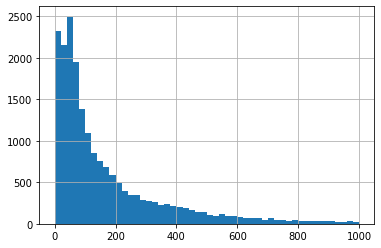

In [36]:
good_data['days_exposition'].hist(bins=50, range=(0, 1000))

In [37]:
# из описательных статистик наибольший интерес представляют
# среднее значение, медиана, 1-й и 3-й квартили
good_data['days_exposition'].describe()

count    19846.000000
mean       177.223017
std        216.065942
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Выводы по длительности продажи квартир:**
- Распределение по длительности продажи квартир по форме напоминает `распределение Пуассона`.
- `Медианное значение` (продаются не менее 50 % квартир) - `93 дня`.
- `Среднее значение` - `177 дней`.
- Продажи занимающие `менее 44 дня` (1-й квартиль) можно считать `быстрыми`.
- Продажи занимающие `более 226 дней` (3-й квартиль) можно считать `медленными`.

#### Изучение факторов, влияющих на стоимость объекта

In [38]:
# факторы, указанные в задании
factors = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_category',
           'day_of_week_exposition', 'month_exposition', 'year_exposition']

In [39]:
# словарь замены категориальных значений ранговыми
cat_to_rank = {"первый": 0, "последний": 1, "другой": 2}

In [40]:
# матрица корреляции для заданных факторов
good_data[factors].replace(cat_to_rank).corr()

,last_price,total_area,living_area,kitchen_area,rooms,floor_category,day_of_week_exposition,month_exposition,year_exposition
last_price,1.000000,0.759683,0.652949,0.558573,0.503918,0.138204,-0.017989,0.003335,-0.019286
total_area,0.759683,1.000000,0.923793,0.513377,0.798303,0.016383,-0.012420,0.004072,-0.072459
living_area,0.652949,0.923793,1.000000,0.265200,0.879970,-0.034198,-0.006672,-0.006051,-0.062530
kitchen_area,0.558573,0.513377,0.265200,1.000000,0.144724,0.115897,-0.012445,0.012959,-0.044510
rooms,0.503918,0.798303,0.879970,0.144724,1.000000,-0.066676,-0.002578,-0.005587,-0.044442
floor_category,0.138204,0.016383,-0.034198,0.115897,-0.066676,1.000000,-0.001875,0.013268,0.018785
day_of_week_exposition,-0.017989,-0.012420,-0.006672,-0.012445,-0.002578,-0.001875,1.000000,0.012461,-0.002574
month_exposition,0.003335,0.004072,-0.006051,0.012959,-0.005587,0.013268,0.012461,1.000000,-0.268296
year_exposition,-0.019286,-0.072459,-0.062530,-0.044510,-0.044442,0.018785,-0.002574,-0.268296,1.000000


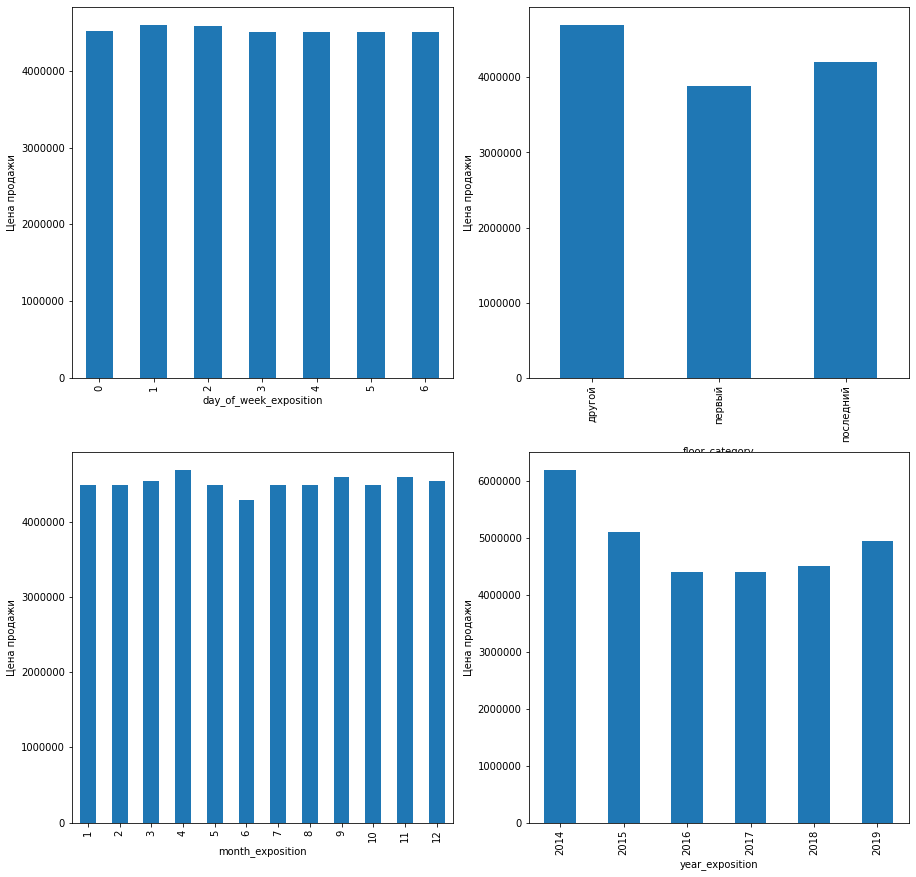

In [41]:
from matplotlib import rcParams

# изменим представление стоимости из экспоненциального вида в обычный
rcParams['axes.formatter.limits'] = (-5, 7)

columns = ['day_of_week_exposition', 'floor_category', 'month_exposition', 'year_exposition']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

for col, ax in zip(columns, ax.flatten()):
    (good_data
     .pivot_table(index=col, values='last_price', aggfunc='median' )
     .plot(ax=ax, kind='bar', ylabel='Цена продажи', legend=False));

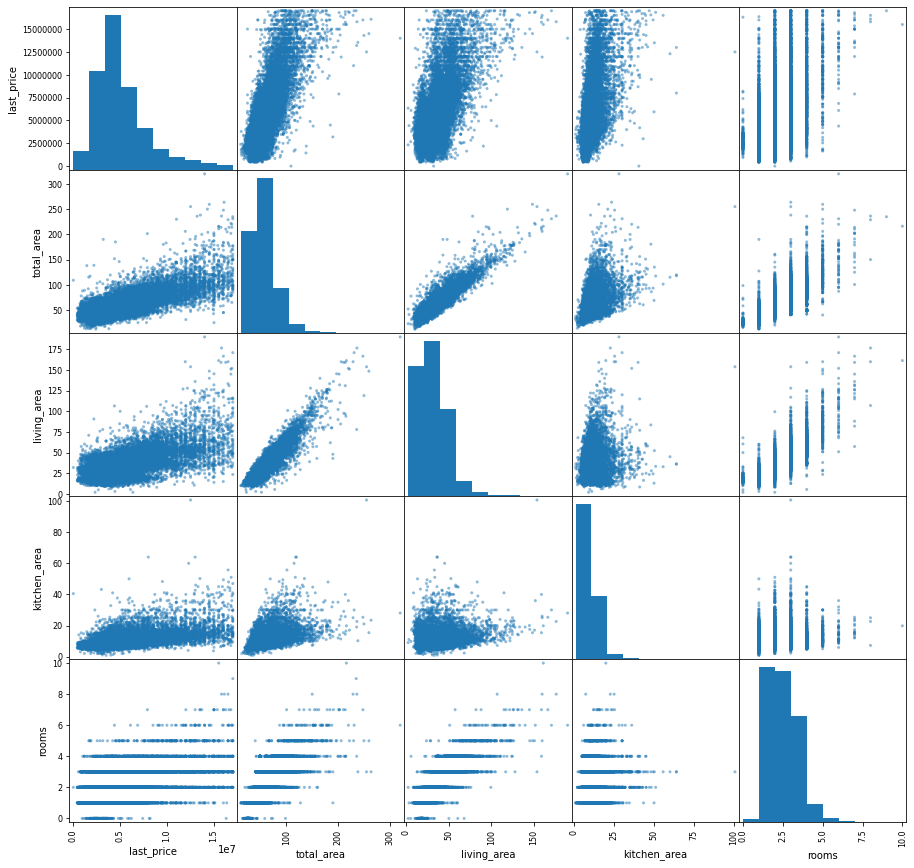

In [42]:
# построим диаграммы рассеяния
pd.plotting.scatter_matrix(good_data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']],
                           figsize=(15, 15));

**Выводы:**
- Некоторая положительная корреляция со стоимостью выявлена для `общей площади`, `жилой площади`, `площади кухни` и `количества комнат`.
- `Стоимость объекта` не зависит от `дня недели` размещения объявления.
- `Стоимость объекта` растёт в зависимости от `категории этажа` в порядке: `первый` -> `последний` -> `другой`.
- `Стоимость объекта` в распределении `по месяцам` показывает локальные `максимумы` в `апреле`, `сентябре` и `ноябре` и `минимум` в `июне`.
- `Стоимость объекта` по годам `снижалась` с `2014 по 2016` годы, в `2016 и 2017` вышла на `плато` и с `2017 по 2019` показывал `рост`.
  

#### Расчёт средней цены одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений

In [43]:
top10_cites = good_data['good_locality_name'].value_counts()[:10].index

In [44]:
(good_data
 # считаем количество записей и среднюю стоимость м2 по населенным пунктам
 .pivot_table(index='good_locality_name',
              values='price_sqm',
              aggfunc=['count', 'mean'])
 # меняем название столбцов
 .set_axis(['count', 'mean'], axis=1)
 # сортируе по убыванию количества записей и берем 10 первых значений
 .sort_values('count',ascending=False)[:10]
)

,count,mean
good_locality_name,,
Санкт-Петербург,14850,107844.808938
Мурино,590,86087.512050
Кудрово,472,95324.930544
Шушары,440,78677.364217
Всеволожск,397,67214.252635
Пушкин,360,101788.572053
Колпино,337,75333.295801
Парголово,327,90175.913458
Гатчина,307,68746.146763


**Выводы:**  
- Населённый пункт с `самой высокой` стоимостью квадратного метра - `Санкт_Петербург` (107 845 руб).
- Населённый пункт с `самой низкой` стоимостью квадратного метра - `Выборг` (57 933 руб).

#### Изучение зависимости стоимости объекта от расстояния до центра города

In [45]:
good_data[['cityCenters_km', 'price_sqm']].corr()

,cityCenters_km,price_sqm
cityCenters_km,1.0000,-0.3874
price_sqm,-0.3874,1.0000


,price_sqm
cityCenters_km,
0.0,118752.879316
1.0,126998.368975
2.0,120803.806172
3.0,111703.026088
4.0,119312.475802
5.0,123133.444002
6.0,125583.098357
7.0,121579.440646
8.0,120665.300520


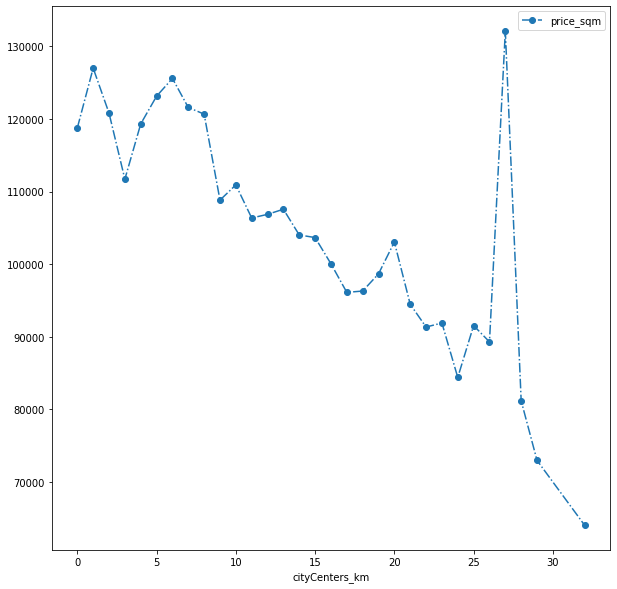

In [46]:
price_per_km = (good_data
.query('good_locality_name == "Санкт-Петербург"')
.pivot_table(index='cityCenters_km', values='price_sqm'))
price_per_km.plot(style='o-.',figsize=(10, 10))
price_per_km

**Выводы:**
- Имеется слабая `обратная корреляция (-0.38)` стоимости между `стоимостью квадратного метра` и `удаленностью объекта от центра` города.
- Средняя стоимость квадратного метра в самом `центре` - `118 752 руб`.
- Средняя стоимость квадратного метра `на окраине` (32 км) - `64 030 руб`.
- При этом есть районы, где больший вес имеют `другие факторы` и `при удаленности 27 км` средняя стоимость квадратного метра составляет `132 116 руб`.

### Общий вывод

В ходе проведенного исследования данных, полученных сервисом `Яндекс.Недвижимость` по `Санкт-Петербургу` и окрестностям за несколько лет были **решены следующие задачи:**
- Произведена загрузка и изучение общей информации, характеризующей набор данных.
- Проведена предобработка данных:
 - *поиск и обработка пропущенных значений по столбцам:*
  - `высота потолка` - заполнена медианным значением по столбцу,
  - `местоположение` - на основании удаленности пропусков от центра заполнена значением "Санкт-Петербург",
  - наличие `балконов` и `апартаменты` - заполнены 0 и False соответственно,
  - данные, генерируемые системой, оставлены без изменения.
 - *Преобразование типов данных:*
  - были преобразованы значения `даты публикации` в формат `даты-времени`.
 - *Устранение неявных дубликатов:*
  - устранение разночтений в написании названий населенных пунктов произведено на основе Собственных имен без указания типов, что позволило устранить `59 неявных дубликатов`.
 - *Обработка выбивающихся значенией:*
  - устранение выбросов по `стоимости объектов` (все что находится за пределами 3х-кратного межквартильного размаха) привело также к нормализации значений по площади объектов и количеству комнат,
  - скорректированы значения `площади кухни` там, где сумма жилой и нежилой площади превышала общую площадь,
  - проведена замена аномальных значений `высоты потолка` на медианное значение.
- Добавлены новые столбцы с вычисленными значениями и категориальными данными.
- Проведён исследовательский анализ данных
 - *Изучен характер распределения данных по заданным признакам*.
 - *Изучен характер распределения длительности продажи квартир:*
  - в `среднем` квартира продается за `93 дня`,
  - `быстрыми` считаются продажи быстрее `44 дней`,
  - `медленными` - дольше, чем `226 дня`.
 - *Изучены факторы, влияющие на стоимость объекта:*
  - наиболее высокая `зависимость` `цены объекта` от его `общей площади` (коэффициент корреляции Пирсона - `0.76`),
  - `стоимость объекта` не зависит от `дня недели` размещения объявления,
  - `стоимость объекта` растёт в зависимости от `категории этажа` в порядке: `первый` -> `последний` -> `другой`,
  - `стоимость объекта` в распределении `по месяцам` показывает локальные `максимумы` в `апреле`, `сентябре` и `ноябре` и `минимум` в `июне`,
  - `стоимость объекта` по годам `снижалась` с `2014 по 2016` годы, в `2016 и 2017` вышла на `плато` и с `2017 по 2019` показывал `рост`.
 - *Произведён расчёт `средней цены квадратного метра` в 10 населённых пунктах с наибольшим числом объявлений:*
  - Населённый пункт с `самой высокой` стоимостью квадратного метра - `Санкт_Петербург` (107 845 руб).
  - Населённый пункт с `самой низкой` стоимостью квадратного метра - `Выборг` (57 933 руб).
 - *Изучена зависимость стоимости объекта от расстояния до центра города:*
  - Имеется `слабая обратная корреляция` (-0.38) стоимости между `стоимостью квадратного метра` и `удаленностью объекта от центра` города.
  - `Средняя стоимость` квадратного метра в самом `центре` - `118 752 руб`.
  - `Средняя стоимость` квадратного метра `на окраине` (32 км) - `64 030 руб`.
  - При этом есть районы, где больший вес имеют другие факторы и при удаленности 27 км средняя стоимость квадратного метра составляет 132 116 руб.  
    
**В целом все задачи, поставленные перед данным исследованием, выполнены. Данные готовы для дальнейшего статистического изучения и создания моделей.**